# Libraries Import.

In [96]:
#Data Exploration Libraries.

import pandas as pd
import numpy as np

#Graph Plotting Libraries.

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#Data Preprocessing Libraries.

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

#Model Libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV



#Self Training Libraries.

from sklearn.semi_supervised import SelfTrainingClassifier

#Evaluation Libraries.

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Notebook Libraries

import warnings
warnings.filterwarnings('ignore')

#Time Library
import time
import timeit

import mkl
mkl.set_num_threads(8)

4

# Important Functions.

In [97]:
def clean_and_preprocess_heart_dataset(heart_dataset):
    #Feature Selection.
    heart_dataset = heart_dataset.drop("chol", axis = 1)
    heart_dataset = heart_dataset.drop("fbs", axis = 1)
    
    #Finding Categorical and Continuous Features.
    categorical_features = []
    continuous_features = []
    for feature in heart_dataset.columns:
        if len(heart_dataset[feature].unique()) <= 10:
            categorical_features.append(feature)
        else:
            continuous_features.append(feature)

    categorical_features, continuous_features

    #One Hot Encoding The Dataset using the categorical features.
    categorical_features.remove("target")
    heart_dataset = pd.get_dummies(heart_dataset, columns=categorical_features)
    
    #Returning Preprocessed Dataset
    return heart_dataset

In [98]:
def clean_and_preprocess_marketing_dataset():
    customer = pd.read_excel("marketing_campaign.xlsx")
    customer.loc[(customer['Income'].isnull() == True), 'Income'] = customer['Income'].median()   
    customer["Age"] = 2021 - customer["Year_Birth"]
    customer.drop("Year_Birth", axis = 1, inplace = True)
    customer.isna().sum()
    customer["Expense"] = customer["MntWines"]+ customer["MntFruits"]+ customer["MntMeatProducts"]+ customer["MntFishProducts"]+ customer["MntSweetProducts"]+ customer["MntGoldProds"]
    customer['Kids'] = customer['Kidhome'] + customer['Teenhome']
    customer['Expenses'] = customer['MntWines'] + customer['MntFruits'] + customer['MntMeatProducts'] + customer['MntFishProducts'] + customer['MntSweetProducts'] + customer['MntGoldProds']
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Married', 'In relationship')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Together', 'In relationship')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Divorced', 'Single')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Widow', 'Single')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Absurd', 'Single')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Alone', 'Single')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('YOLO', 'Single')
    customer['Education'] = customer['Education'].str.replace('2n Cycle', 'Master') 
    customer['Dt_Customer'] = pd.to_datetime(customer.Dt_Customer)
    customer['Date_Collected'] = '01-01-2015'
    customer['Date_Collected'] = pd.to_datetime(customer.Date_Collected)
    customer['Time_Enrolled_Days'] = (customer['Date_Collected'] - customer['Dt_Customer']).dt.days
    customer = customer.drop(columns=[
       'ID', 'Dt_Customer', 'Kidhome', 'Recency', 'NumDealsPurchases', 
       'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Date_Collected'
       ])
    categorical_features = ['Education', 'Marital_Status']
    customer = pd.get_dummies(customer, columns=categorical_features)
    customer = customer[customer["Age"] < 90]
    customer["Teenhome"] = np.where(customer.Teenhome> 0, 1, 0)
    
    return customer

In [99]:
def clean_and_preprocess_intention_dataset(intention):
    cols = ['Administrative', 'ProductRelated', 'ExitRates', 'VisitorType', 'Informational', 'PageValues', 'SpecialDay', 'Revenue']
    intention = intention[cols]
    intention = pd.get_dummies(intention, columns=["VisitorType"])
    
    return intention

In [100]:
def clean_and_preprocess_intention_upsampling():
    intention = pd.read_csv("online_shoppers_intention.csv")
    intention = intention.sample(frac = 1.0, random_state = 42)
    train_data = intention[:int(0.7 * len(intention))]
    test_data = intention[int(0.7 * len(intention)):]
    
    train_data_minority = train_data[train_data.Revenue == True]
    train_data_majority = train_data[train_data.Revenue == False]

    train_data_minority_upsampled = resample(train_data_minority,random_state=42,n_samples=7308,replace=True)
    train_data_upsampled = pd.concat([train_data_majority, train_data_minority_upsampled])
    train_data = train_data_upsampled.sample(frac = 1.0, random_state = 42)
    
    cols = ['Administrative', 'ProductRelated', 'ExitRates', 'VisitorType', 'Informational', 'PageValues', 'SpecialDay', 'Revenue']
    train_data = train_data[cols]
    test_data = test_data[cols]
    train_data = pd.get_dummies(train_data, columns=["VisitorType"])
    test_data = pd.get_dummies(test_data, columns=["VisitorType"])
    

    return train_data, test_data

In [101]:
def clean_and_preprocess_intention_downsampling():
    intention = pd.read_csv("online_shoppers_intention.csv")
    intention = intention.sample(frac = 1.0, random_state = 42)
    train_data = intention[:int(0.7 * len(intention))]
    test_data = intention[int(0.7 * len(intention)):]
    
    train_data_minority = train_data[train_data.Revenue == True]
    train_data_majority = train_data[train_data.Revenue == False]
    
    train_data_majority_downsampled = resample(train_data_majority,random_state=42,n_samples=len(train_data_minority),replace=True)
    train_data_downsampled = pd.concat([train_data_minority, train_data_majority_downsampled])
    train_data = train_data_downsampled.sample(frac = 1.0, random_state = 42)
    
    cols = ['Administrative', 'ProductRelated', 'ExitRates', 'VisitorType', 'Informational', 'PageValues', 'SpecialDay', 'Revenue']
    train_data = train_data[cols]
    test_data = test_data[cols]
    train_data = pd.get_dummies(train_data, columns=["VisitorType"])
    test_data = pd.get_dummies(test_data, columns=["VisitorType"])
    
    return train_data, test_data

In [102]:
def clean_and_preprocess_intention_dataset(intention):
    cols = ['Administrative', 'ProductRelated', 'ExitRates', 'VisitorType', 'Informational', 'PageValues', 'SpecialDay', 'Revenue']
    intention = intention[cols]
    intention = pd.get_dummies(intention, columns=["VisitorType"])
    
    return intention

In [103]:
def train_data_test_data(dataset, test_size = 0.3):
    dataset = dataset.sample(frac = 1.0, random_state = 42)
    train_data = dataset[:int((1 - test_size) * len(dataset))]
    test_data = dataset[int((1 - test_size) * len(dataset)):]
   
    
    return train_data, test_data

In [104]:
def train_test_split(train_data, test_data, targetname):
    X_train = train_data.drop(targetname, axis = 1)
    X_test = test_data.drop(targetname, axis = 1)
    
    y_train = train_data[targetname]
    y_test = test_data[targetname]
    
    return X_train, y_train, X_test, y_test

In [105]:
def unlabelled_data(train_data, targetname, random_state = 42, threshold = 0.1):
    random_state = np.random.RandomState(42)
    random_unlabeled_points = random_state.rand(train_data[targetname].shape[0]) < threshold
    train_data[random_unlabeled_points] = -1
    
    return train_data

In [106]:
def scaling(train_data, test_data, cols):
    scaler = StandardScaler()
    
    train_data[cols] = scaler.fit_transform(train_data[cols])
    test_data[cols] = scaler.transform(test_data[cols])
        
    return train_data, test_data

In [107]:
def train_and_evaluate_model(experimentname, model, X_train, y_train, X_test, y_test, random_state = 42):
    print(f"Experiment: {experimentname}")
    self_trained_model = SelfTrainingClassifier(model, criterion = "k_best", k_best = 10)
    self_trained_model.fit(X_train, y_train)
    
    model_preds = self_trained_model.predict(X_test)
    class_report = classification_report(y_true = y_test, y_pred=model_preds)
    conf_mat = confusion_matrix(y_true = y_test, y_pred = model_preds)
    
    print(f"Accuracy: {accuracy_score(y_test, model_preds) * 100}%") 
    print(f"F1 Score: {f1_score(y_test, model_preds)}")
    print("Classification Report")
    print(class_report)
    print("ROC Curve")
    plot_roc_curve(self_trained_model, X_test, y_test)
    plt.show()
    print("\n")
    print("----------------------------------------------------")
    
    return accuracy_score(y_test, model_preds), f1_score(y_test, model_preds)

In [108]:
def plot_final_trend(threshold_values, accuracy_values, f1_values, timer_values):

    evaluation_dict = {"threshold_value" : threshold_values,
                       "accuracy" : accuracy_values,
                       "f1_scores" : f1_values,
                       "Time": timer_values}

    trend = pd.DataFrame(evaluation_dict)
    trend.plot(x ='threshold_value', y='accuracy')
    trend.plot(x ='threshold_value', y='f1_scores') 
    trend.plot(x ='threshold_value', y='Time') 

# Heart Disease.

Experiment: 0.0% Unlabelled Data
Accuracy: 84.61538461538461%
F1 Score: 0.8599999999999999
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.86      0.86      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91

ROC Curve


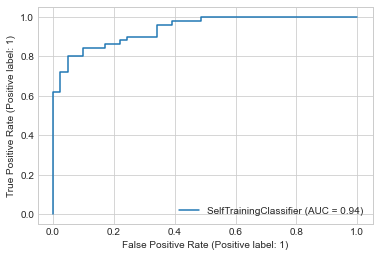



----------------------------------------------------
Experiment: 10.0% Unlabelled Data
Accuracy: 83.51648351648352%
F1 Score: 0.8514851485148515
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91

ROC Curve


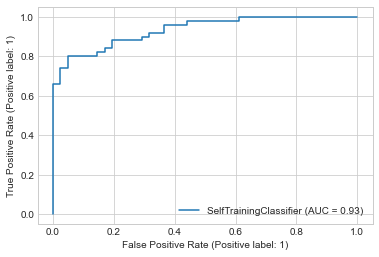



----------------------------------------------------
Experiment: 20.0% Unlabelled Data
Accuracy: 85.71428571428571%
F1 Score: 0.8785046728971964
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        41
           1       0.82      0.94      0.88        50

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91

ROC Curve


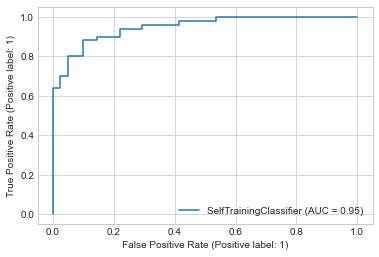



----------------------------------------------------
Experiment: 50.0% Unlabelled Data
Accuracy: 80.21978021978022%
F1 Score: 0.8421052631578947
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.61      0.74        41
           1       0.75      0.96      0.84        50

    accuracy                           0.80        91
   macro avg       0.84      0.78      0.79        91
weighted avg       0.83      0.80      0.79        91

ROC Curve


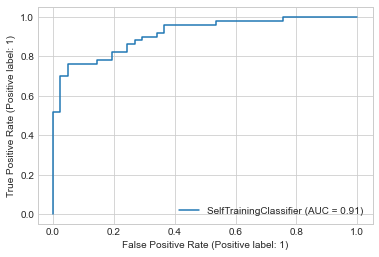



----------------------------------------------------
Experiment: 90.0% Unlabelled Data
Accuracy: 67.03296703296702%
F1 Score: 0.7619047619047619
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.32      0.46        41
           1       0.63      0.96      0.76        50

    accuracy                           0.67        91
   macro avg       0.75      0.64      0.61        91
weighted avg       0.74      0.67      0.63        91

ROC Curve


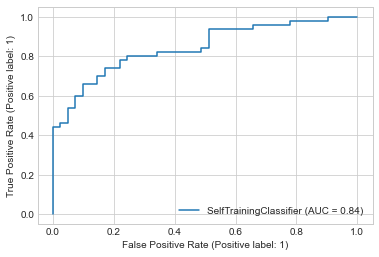



----------------------------------------------------
Experiment: 95.0% Unlabelled Data
Accuracy: 45.05494505494506%
F1 Score: 0.0
Classification Report
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        41
           1       0.00      0.00      0.00        50

    accuracy                           0.45        91
   macro avg       0.23      0.50      0.31        91
weighted avg       0.20      0.45      0.28        91

ROC Curve


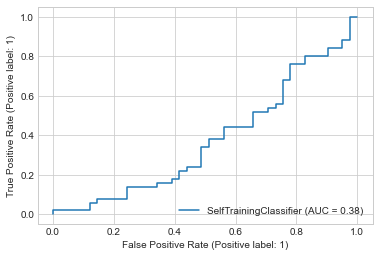



----------------------------------------------------


In [109]:
threshold_values = [0.0, 0.1, 0.2, 0.5, 0.9, 0.95]
accuracy_values = []
f1_values = []
timer_values = []
model = LinearSVC()
model = CalibratedClassifierCV(model) 
cols_scaling = ['age', 'trestbps', 'thalach', 'oldpeak']

for i in threshold_values:
    start = timeit.default_timer()
    heart_dataset = pd.read_csv("heart.csv")
    heart_dataset = clean_and_preprocess_heart_dataset(heart_dataset)
    train_data, test_data = train_data_test_data(dataset = heart_dataset, test_size = 0.3)
    train_data, test_data = scaling(train_data, test_data, cols_scaling)
    train_data = unlabelled_data(train_data, "target", threshold = i)
    X_train, y_train, X_test, y_test = train_test_split(train_data = train_data, test_data = test_data, targetname = "target")
    accuracy_value, f1_value = train_and_evaluate_model(experimentname = f"{i * 100}% Unlabelled Data", model = model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)
    accuracy_values.append(accuracy_value)
    f1_values.append(f1_value)
    stop = timeit.default_timer()
    timer_values.append(stop - start)

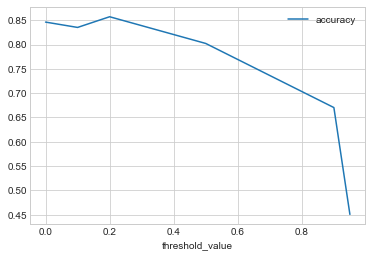

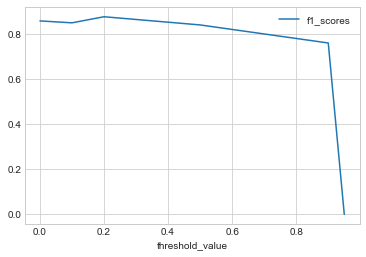

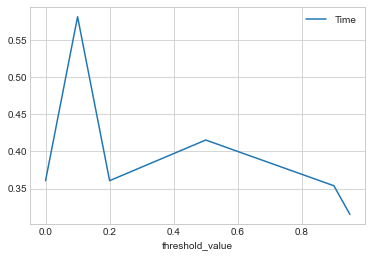

In [110]:
plot_final_trend(threshold_values, accuracy_values, f1_values, timer_values)

# Marketing Dataset.

Experiment: 0.0% Unlabelled Data
Accuracy: 92.85714285714286%
F1 Score: 0.9266055045871558
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       337
           1       0.95      0.90      0.93       335

    accuracy                           0.93       672
   macro avg       0.93      0.93      0.93       672
weighted avg       0.93      0.93      0.93       672

ROC Curve


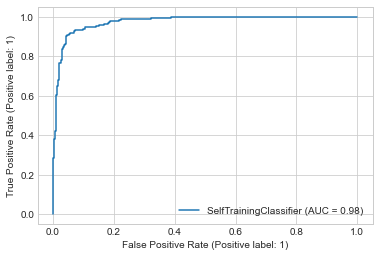



----------------------------------------------------
Experiment: 10.0% Unlabelled Data
Accuracy: 92.70833333333334%
F1 Score: 0.9247311827956989
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       337
           1       0.95      0.90      0.92       335

    accuracy                           0.93       672
   macro avg       0.93      0.93      0.93       672
weighted avg       0.93      0.93      0.93       672

ROC Curve


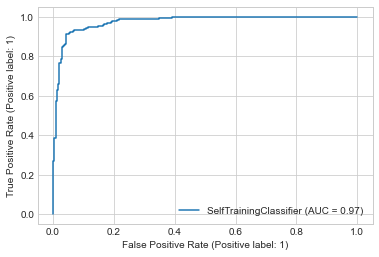



----------------------------------------------------
Experiment: 20.0% Unlabelled Data
Accuracy: 92.70833333333334%
F1 Score: 0.9247311827956989
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       337
           1       0.95      0.90      0.92       335

    accuracy                           0.93       672
   macro avg       0.93      0.93      0.93       672
weighted avg       0.93      0.93      0.93       672

ROC Curve


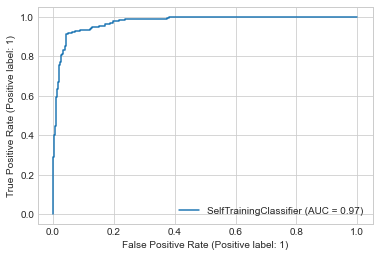



----------------------------------------------------
Experiment: 50.0% Unlabelled Data
Accuracy: 92.11309523809523%
F1 Score: 0.9180834621329211
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       337
           1       0.95      0.89      0.92       335

    accuracy                           0.92       672
   macro avg       0.92      0.92      0.92       672
weighted avg       0.92      0.92      0.92       672

ROC Curve


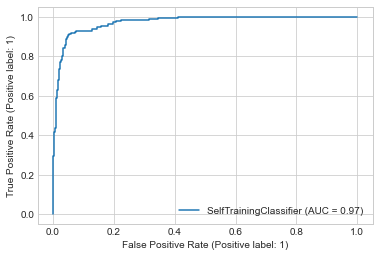



----------------------------------------------------
Experiment: 90.0% Unlabelled Data
Accuracy: 88.39285714285714%
F1 Score: 0.884272997032641
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       337
           1       0.88      0.89      0.88       335

    accuracy                           0.88       672
   macro avg       0.88      0.88      0.88       672
weighted avg       0.88      0.88      0.88       672

ROC Curve


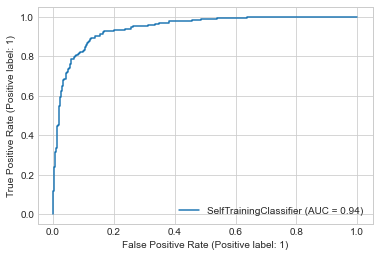



----------------------------------------------------
Experiment: 95.0% Unlabelled Data
Accuracy: 86.30952380952381%
F1 Score: 0.8588957055214723
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       337
           1       0.88      0.84      0.86       335

    accuracy                           0.86       672
   macro avg       0.86      0.86      0.86       672
weighted avg       0.86      0.86      0.86       672

ROC Curve


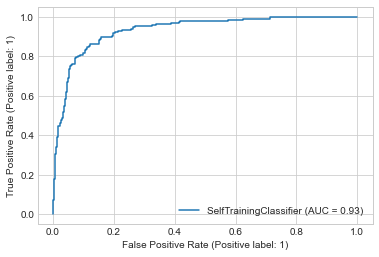



----------------------------------------------------


In [111]:
threshold_values = [0.0, 0.1, 0.2, 0.5, 0.9, 0.95]
accuracy_values = []
f1_values = []
timer_values = []
model = LinearSVC()
model = CalibratedClassifierCV(model) 

for i in threshold_values:
    start = timeit.default_timer()
    marketing_dataset = pd.read_excel("marketing_campaign.xlsx")
    marketing_dataset = clean_and_preprocess_marketing_dataset()
    train_data, test_data = train_data_test_data(dataset = marketing_dataset, test_size = 0.3)
    cols = train_data.columns
    cols = list(cols)
    cols.remove("Teenhome")
    cols
    train_data, test_data = scaling(train_data, test_data, cols)
    train_data = unlabelled_data(train_data, "Teenhome", threshold = i)
    X_train, y_train, X_test, y_test = train_test_split(train_data = train_data, test_data = test_data, targetname = "Teenhome")
    accuracy_value, f1_value = train_and_evaluate_model(experimentname = f"{i * 100}% Unlabelled Data", model = model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)
    accuracy_values.append(accuracy_value)
    f1_values.append(f1_value)
    stop = timeit.default_timer()
    timer_values.append(stop - start)

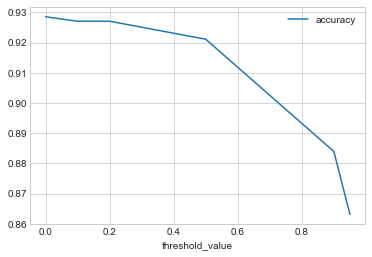

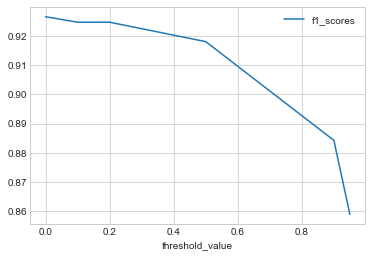

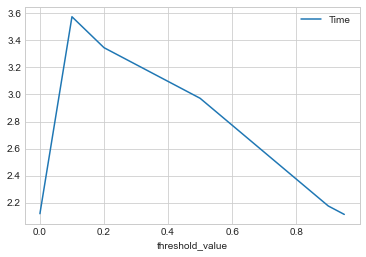

In [112]:
plot_final_trend(threshold_values, accuracy_values, f1_values, timer_values)

# Customer Intention (imbalanced)

Experiment: 0.0% Unlabelled Data
Accuracy: 88.26709921600433%
F1 Score: 0.5241228070175439
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3114
           1       0.73      0.41      0.52       585

    accuracy                           0.88      3699
   macro avg       0.81      0.69      0.73      3699
weighted avg       0.87      0.88      0.87      3699

ROC Curve


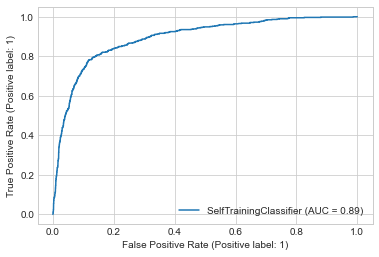



----------------------------------------------------
Experiment: 10.0% Unlabelled Data
Accuracy: 88.24006488240065%
F1 Score: 0.5235487404162104
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3114
           1       0.73      0.41      0.52       585

    accuracy                           0.88      3699
   macro avg       0.81      0.69      0.73      3699
weighted avg       0.87      0.88      0.87      3699

ROC Curve


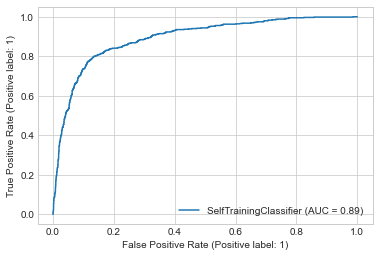



----------------------------------------------------
Experiment: 20.0% Unlabelled Data
Accuracy: 88.294133549608%
F1 Score: 0.5183537263626251
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3114
           1       0.74      0.40      0.52       585

    accuracy                           0.88      3699
   macro avg       0.82      0.69      0.73      3699
weighted avg       0.87      0.88      0.87      3699

ROC Curve


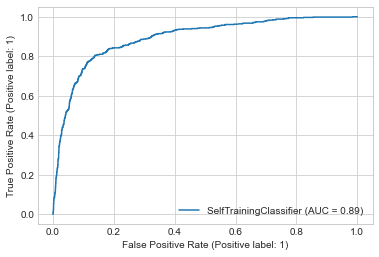



----------------------------------------------------
Experiment: 50.0% Unlabelled Data
Accuracy: 88.15896188158962%
F1 Score: 0.5144124168514412
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3114
           1       0.73      0.40      0.51       585

    accuracy                           0.88      3699
   macro avg       0.81      0.68      0.72      3699
weighted avg       0.87      0.88      0.87      3699

ROC Curve


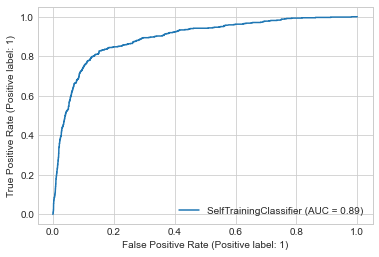



----------------------------------------------------
Experiment: 90.0% Unlabelled Data
Accuracy: 87.26682887266828%
F1 Score: 0.4290909090909091
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3114
           1       0.74      0.30      0.43       585

    accuracy                           0.87      3699
   macro avg       0.81      0.64      0.68      3699
weighted avg       0.86      0.87      0.85      3699

ROC Curve


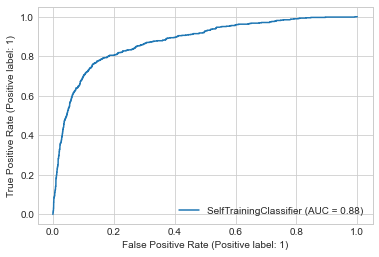



----------------------------------------------------
Experiment: 95.0% Unlabelled Data
Accuracy: 88.53744255204109%
F1 Score: 0.5309734513274337
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3114
           1       0.75      0.41      0.53       585

    accuracy                           0.89      3699
   macro avg       0.83      0.69      0.73      3699
weighted avg       0.87      0.89      0.87      3699

ROC Curve


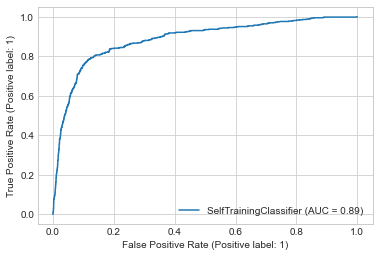



----------------------------------------------------


In [113]:
threshold_values = [0.0, 0.1, 0.2, 0.5, 0.9, 0.95]
accuracy_values = []
f1_values = []
timer_values = []
model = LinearSVC()
model = CalibratedClassifierCV(model) 


for i in threshold_values:
    start = timeit.default_timer()
    intention = pd.read_csv("online_shoppers_intention.csv")
    intention = clean_and_preprocess_intention_dataset(intention)
    intention["Revenue"] *= 1
    train_data, test_data = train_data_test_data(dataset = intention, test_size = 0.3)
    cols = train_data.columns
    cols = list(cols)
    if ("Revenue" in cols):
        cols.remove("Revenue")
    cols
    train_data, test_data = scaling(train_data, test_data, cols)
    train_data = unlabelled_data(train_data, "Revenue", threshold = i)
    X_train, y_train, X_test, y_test = train_test_split(train_data = train_data, test_data = test_data, targetname = "Revenue")
    accuracy_value, f1_value = train_and_evaluate_model(experimentname = f"{i * 100}% Unlabelled Data", model = model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)
    accuracy_values.append(accuracy_value)
    f1_values.append(f1_value)
    stop = timeit.default_timer()
    timer_values.append(stop - start)

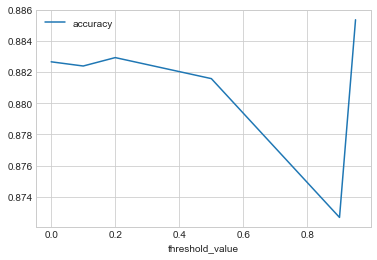

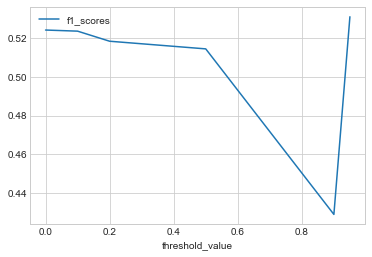

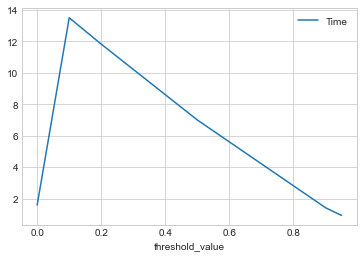

In [114]:
plot_final_trend(threshold_values, accuracy_values, f1_values, timer_values)

# Customer Intention Balanced Upsampled.

Experiment: 0.0% Unlabelled Data
Accuracy: 85.56366585563666%
F1 Score: 0.6163793103448275
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3114
           1       0.53      0.73      0.62       585

    accuracy                           0.86      3699
   macro avg       0.74      0.81      0.76      3699
weighted avg       0.88      0.86      0.86      3699

ROC Curve


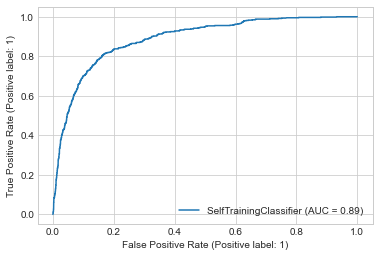



----------------------------------------------------
Experiment: 10.0% Unlabelled Data
Accuracy: 85.64476885644768%
F1 Score: 0.6171593366979091
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3114
           1       0.53      0.73      0.62       585

    accuracy                           0.86      3699
   macro avg       0.74      0.81      0.76      3699
weighted avg       0.88      0.86      0.87      3699

ROC Curve


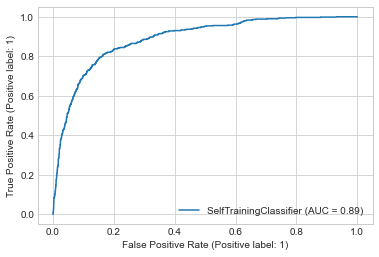



----------------------------------------------------
Experiment: 20.0% Unlabelled Data
Accuracy: 85.77994052446607%
F1 Score: 0.6193921852387844
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3114
           1       0.54      0.73      0.62       585

    accuracy                           0.86      3699
   macro avg       0.74      0.81      0.77      3699
weighted avg       0.88      0.86      0.87      3699

ROC Curve


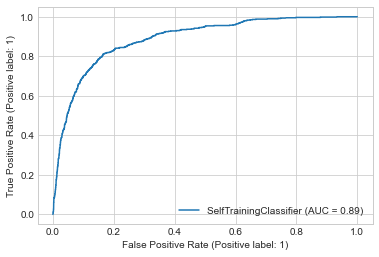



----------------------------------------------------
Experiment: 50.0% Unlabelled Data
Accuracy: 86.45579886455799%
F1 Score: 0.6275092936802973
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3114
           1       0.56      0.72      0.63       585

    accuracy                           0.86      3699
   macro avg       0.75      0.81      0.77      3699
weighted avg       0.88      0.86      0.87      3699

ROC Curve


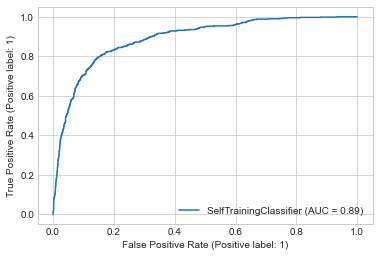



----------------------------------------------------
Experiment: 90.0% Unlabelled Data
Accuracy: 86.50986753176534%
F1 Score: 0.6262172284644195
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3114
           1       0.56      0.71      0.63       585

    accuracy                           0.87      3699
   macro avg       0.75      0.80      0.77      3699
weighted avg       0.88      0.87      0.87      3699

ROC Curve


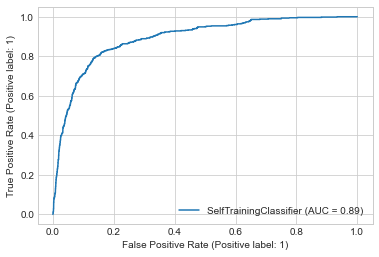



----------------------------------------------------
Experiment: 95.0% Unlabelled Data
Accuracy: 86.59097053257638%
F1 Score: 0.6304023845007451
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3114
           1       0.56      0.72      0.63       585

    accuracy                           0.87      3699
   macro avg       0.75      0.81      0.77      3699
weighted avg       0.88      0.87      0.87      3699

ROC Curve


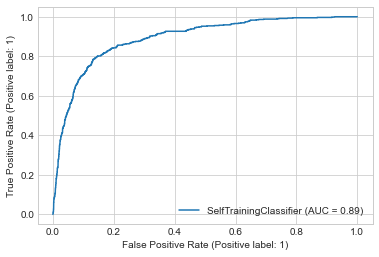



----------------------------------------------------


In [115]:
threshold_values = [0.0, 0.1, 0.2, 0.5, 0.9, 0.95]
accuracy_values = []
f1_values = []
timer_values = []
model = LinearSVC()
model = CalibratedClassifierCV(model) 


for i in threshold_values:
    start = timeit.default_timer()
    intention = pd.read_csv("online_shoppers_intention.csv") 
    train_data, test_data = clean_and_preprocess_intention_upsampling()
    train_data["Revenue"] *= 1
    test_data["Revenue"] *= 1
    cols = train_data.columns
    cols = list(cols)
    if ("Revenue" in cols):
        cols.remove("Revenue")
    cols
    train_data, test_data = scaling(train_data, test_data, cols)
    train_data = unlabelled_data(train_data, "Revenue", threshold = i)
    X_train, y_train, X_test, y_test = train_test_split(train_data = train_data, test_data = test_data, targetname = "Revenue")
    accuracy_value, f1_value = train_and_evaluate_model(experimentname = f"{i * 100}% Unlabelled Data", model = model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)
    accuracy_values.append(accuracy_value)
    f1_values.append(f1_value)
    stop = timeit.default_timer()
    timer_values.append(stop - start)

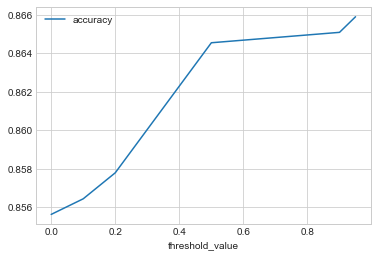

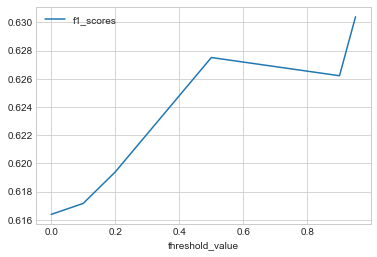

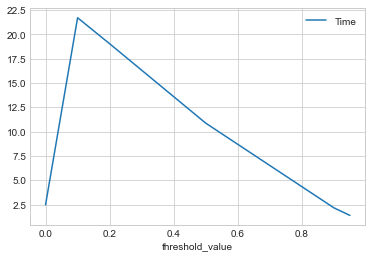

In [116]:
plot_final_trend(threshold_values, accuracy_values, f1_values, timer_values)

# Customer Intention Balanced Downsampled.

Experiment: 0.0% Unlabelled Data
Accuracy: 86.50986753176534%
F1 Score: 0.6355003652300949
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3114
           1       0.55      0.74      0.64       585

    accuracy                           0.87      3699
   macro avg       0.75      0.82      0.78      3699
weighted avg       0.89      0.87      0.87      3699

ROC Curve


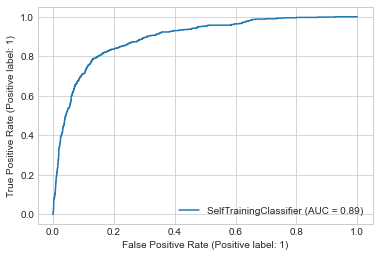



----------------------------------------------------
Experiment: 10.0% Unlabelled Data
Accuracy: 86.6720735333874%
F1 Score: 0.6382978723404256
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3114
           1       0.56      0.74      0.64       585

    accuracy                           0.87      3699
   macro avg       0.75      0.82      0.78      3699
weighted avg       0.89      0.87      0.87      3699

ROC Curve


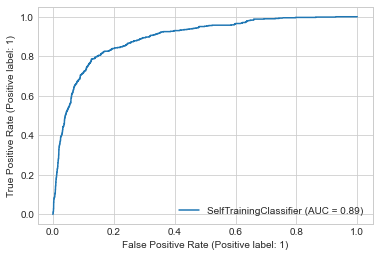



----------------------------------------------------
Experiment: 20.0% Unlabelled Data
Accuracy: 86.42876453095431%
F1 Score: 0.6357039187227866
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3114
           1       0.55      0.75      0.64       585

    accuracy                           0.86      3699
   macro avg       0.75      0.82      0.78      3699
weighted avg       0.89      0.86      0.87      3699

ROC Curve


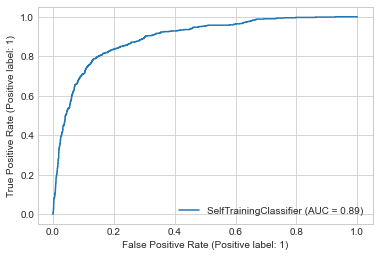



----------------------------------------------------
Experiment: 50.0% Unlabelled Data
Accuracy: 85.42849418761827%
F1 Score: 0.6180014174344436
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3114
           1       0.53      0.75      0.62       585

    accuracy                           0.85      3699
   macro avg       0.74      0.81      0.76      3699
weighted avg       0.88      0.85      0.86      3699

ROC Curve


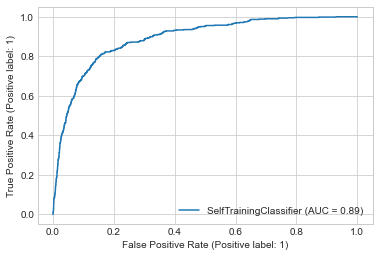



----------------------------------------------------
Experiment: 90.0% Unlabelled Data
Accuracy: 81.6977561503109%
F1 Score: 0.577666874610106
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3114
           1       0.45      0.79      0.58       585

    accuracy                           0.82      3699
   macro avg       0.70      0.81      0.73      3699
weighted avg       0.88      0.82      0.83      3699

ROC Curve


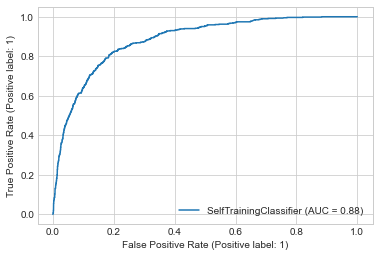



----------------------------------------------------
Experiment: 95.0% Unlabelled Data
Accuracy: 82.86023249526899%
F1 Score: 0.5784574468085106
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3114
           1       0.47      0.74      0.58       585

    accuracy                           0.83      3699
   macro avg       0.71      0.79      0.74      3699
weighted avg       0.87      0.83      0.84      3699

ROC Curve


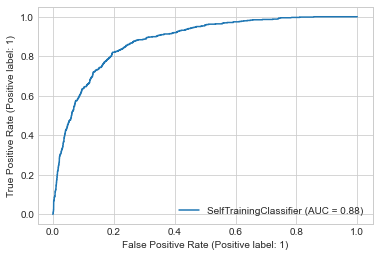



----------------------------------------------------


In [117]:
threshold_values = [0.0, 0.1, 0.2, 0.5, 0.9, 0.95]
accuracy_values = []
f1_values = []
timer_values = []
model = LinearSVC()
model = CalibratedClassifierCV(model) 


for i in threshold_values:
    start = timeit.default_timer()
    intention = pd.read_csv("online_shoppers_intention.csv") 
    train_data, test_data = clean_and_preprocess_intention_downsampling()
    train_data["Revenue"] *= 1
    test_data["Revenue"] *= 1
    cols = train_data.columns
    cols = list(cols)
    if ("Revenue" in cols):
        cols.remove("Revenue")
    cols
    train_data, test_data = scaling(train_data, test_data, cols)
    train_data = unlabelled_data(train_data, "Revenue", threshold = i)
    X_train, y_train, X_test, y_test = train_test_split(train_data = train_data, test_data = test_data, targetname = "Revenue")
    accuracy_value, f1_value = train_and_evaluate_model(experimentname = f"{i * 100}% Unlabelled Data", model = model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)
    accuracy_values.append(accuracy_value)
    f1_values.append(f1_value)
    stop = timeit.default_timer()
    timer_values.append(stop - start)

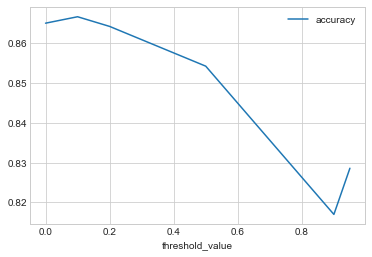

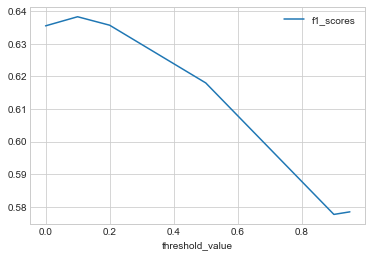

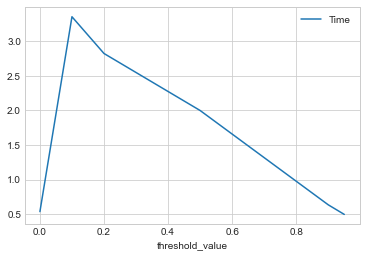

In [118]:
plot_final_trend(threshold_values, accuracy_values, f1_values, timer_values)